## Neste Projecto vamos ter duas partes:
<br>

* A primeira é com TF e com um modelo base de TF que venha com o curso e depois melhoramos com um Transformer do TF. 
<br>
* A segunda com um trasformer apenas mas tentado usar ou Pytorch ou com Jax

## O Projecto é sobre resumo de medical abstracts:

<br>

* Vamos replicar um paper : https://arxiv.org/abs/1710.06071 que é basicamente um paper sobre multiclass classification

# Getting the data

In [1]:
# usei o seguinte:
# !git clone URL

In [1]:
directoria_dados = 'C:\\Users\\manue\\Downloads\\S2-Economics\\NLP_Tensorflow_Course\\Udemy\\pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign'

In [2]:
import os
for dirname, dirnames, filenames in os.walk(directoria_dados):
    # print path to all subdirectories first.
    for subdirname in dirnames:
        print(os.path.join(dirname, subdirname))

    # print path to all filenames.
    for filename in filenames:
        print('Filename:',os.path.join(dirname, filename),'\n')


Filename: C:\Users\manue\Downloads\S2-Economics\NLP_Tensorflow_Course\Udemy\pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign\dev.txt 

Filename: C:\Users\manue\Downloads\S2-Economics\NLP_Tensorflow_Course\Udemy\pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign\test.txt 

Filename: C:\Users\manue\Downloads\S2-Economics\NLP_Tensorflow_Course\Udemy\pubmed-rct\PubMed_20k_RCT_numbers_replaced_with_at_sign\train.txt 



In [3]:
# Dev é validation set

In [4]:
# Start looking at the data, the numbers are replaced by @'s
filenames = [os.path.join(directoria_dados, filenames) for filenames in os.listdir(directoria_dados)]
filenames

['C:\\Users\\manue\\Downloads\\S2-Economics\\NLP_Tensorflow_Course\\Udemy\\pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\dev.txt',
 'C:\\Users\\manue\\Downloads\\S2-Economics\\NLP_Tensorflow_Course\\Udemy\\pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\test.txt',
 'C:\\Users\\manue\\Downloads\\S2-Economics\\NLP_Tensorflow_Course\\Udemy\\pubmed-rct\\PubMed_20k_RCT_numbers_replaced_with_at_sign\\train.txt']

### proprocessing functions applied to the data

In [5]:
# Let's get all the lines in the txt.
def get_all_lines(filename):
    """
    Reads the txt and returns all lines into a list
    """
    string_list = []
    with open(filename,'r') as f:
        return f.readlines()

In [6]:
train_lines = get_all_lines(filenames[2])
test_lines = get_all_lines(filenames[1])
valid_lines = get_all_lines(filenames[0])

In [7]:
len(train_lines), len(test_lines),len(valid_lines)

(210040, 35135, 35212)

In [8]:
train_lines[1]

'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n'

#### Tens de formular a estrutura dos dados, que neste caso tem de  incluir a ordem das frasespor ID, pq a ordem intressa para a classificação. Ele recomenda:

<br>

 **[{line_number :0, target :'Background', text : 'blablabla', 'total_number_of_lines' : 5} , ... ]**

In [9]:
def turn_into_list_of_dict(lista):
    
    final_list = []
    number_of_lines = 0
    last = 0
    for list_id in range(1,len(lista)):
        current_dict = {}
        
        if(lista[list_id][:3] == '###' or list_id == len(lista) -1):       
            for i in range(last , len(final_list)):
                last = len(final_list)
                final_list[i]['total_lines'] = number_of_lines
            number_of_lines = 0
            continue
        
        elif(lista[list_id] == '\n'):
            continue
            
        else:
            current_dict['line_number'] = number_of_lines
            current_dict['target'] = lista[list_id].split('\t')[0]
            current_dict['text'] = lista[list_id].split('\t')[1]
            number_of_lines += 1
        final_list.append(current_dict)
    return final_list

In [10]:
%%time
test_data = turn_into_list_of_dict(test_lines)
train_data = turn_into_list_of_dict(train_lines)
valid_data = turn_into_list_of_dict(valid_lines)

Wall time: 418 ms


In [11]:
#train_data[:15]

In [12]:
len(test_data),len(train_data),len(valid_data)

(30135, 180040, 30212)

In [13]:
## Ok vamos passar os dados para um dataframe

## Small EDA

In [14]:
import pandas as pd
train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
valid_df = pd.DataFrame(valid_data)

C:\Users\manue\anaconda3\envs\mlcourse\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\manue\anaconda3\envs\mlcourse\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\manue\anaconda3\envs\mlcourse\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [15]:
train_df.head(15)

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,A total of @ patients with primary knee OA wer...,12
2,2,METHODS,Outcome measures included pain reduction and i...,12
3,3,METHODS,Pain was assessed using the visual analog pain...,12
4,4,METHODS,Secondary outcome measures included the Wester...,12
5,5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",12
6,6,RESULTS,There was a clinically relevant reduction in t...,12
7,7,RESULTS,The mean difference between treatment arms ( @...,12
8,8,RESULTS,"Further , there was a clinically relevant redu...",12
9,9,RESULTS,These differences remained significant at @ we...,12


In [16]:
train_df.target.value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

<AxesSubplot:ylabel='Frequency'>

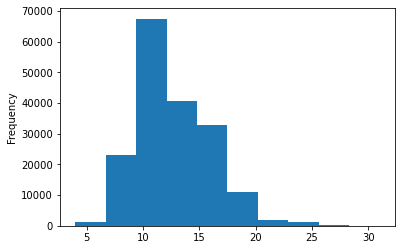

In [17]:
# get lengths of abstracts 
train_df.total_lines.plot.hist()

In [18]:
# Convert abstract text lines into lists
train_sentences = train_df['text'].to_list()
test_sentences = test_df['text'].to_list()
valid_sentences = valid_df['text'].to_list()

In [19]:
train_sentences[:2]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n']

### Label encoding

In [111]:
# Lets one hot encode our labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse = False) # pq o Tf é incompatível com True
train_labels_encoded_OH = one_hot_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_labels_encoded_OH = one_hot_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))
valid_labels_encoded_OH = one_hot_encoder.transform(valid_df['target'].to_numpy().reshape(-1,1))
train_labels_encoded_OH.shape

(180040, 5)

In [112]:
# tb podemos usar um label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_df['target'].to_numpy().reshape(-1,1))
test_labels_encoded = label_encoder.transform(test_df['target'].to_numpy().reshape(-1,1))
valid_labels_encoded = label_encoder.transform(valid_df['target'].to_numpy().reshape(-1,1))
train_labels_encoded.shape

C:\Users\manue\anaconda3\envs\mlcourse\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


(180040,)

In [113]:
train_labels_encoded[:5]

array([3, 2, 2, 2, 2])

In [114]:
train_labels_encoded_OH[:5]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [115]:
# Get a mapping from number to text:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes,class_names

(5,
 array(['BACKGROUND', 'CONCLUSIONS', 'METHODS', 'OBJECTIVE', 'RESULTS'],
       dtype=object))

## Model 0: Naive Bayes Model as Baseline (TF-IDF Multinomial Bayes classifier)

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create pipeline
model_0 = Pipeline([
    ("tfidf",TfidfVectorizer()), # convert words into numbers
    ("clf",MultinomialNB()) # fit the model
])

model_0.fit(train_sentences, train_labels_encoded)


Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [117]:
baseline_score = model_0.score(valid_sentences, valid_labels_encoded)
print(f'Our baseline model gets an accuracy of : {baseline_score*100:.2f}%')
baseline_score_test = model_0.score(test_sentences, test_labels_encoded)
print(f'Our baseline model gets an accuracy of : {baseline_score_test*100:.2f}%')

Our baseline model gets an accuracy of : 71.42%
Our baseline model gets an accuracy of : 71.10%


In [118]:
# Looking at other metrcis because we have a lot of classes
baseline_val_preds = model_0.predict(valid_sentences)

In [499]:
from Helper_functions import calculate_results

In [120]:
baseline_results = calculate_results(baseline_val_preds, valid_labels_encoded)
baseline_results

{'accuracy': 71.41864159936449,
 'precision': 0.7887652136138043,
 'recall': 0.714186415993645,
 'f1': 0.7422418447653107}

### Model 1 : Conv1D Model

In [121]:
train_sentences[:4]

['To investigate the efficacy of  weeks of daily lowdose oral prednisolone in improving pain , mobility , and systemic lowgrade inflammation in the short term and whether the effect would be sustained at  weeks in older adults with moderate to severe knee osteoarthritis  OA  .\n',
 'A total of  patients with primary knee OA were randomized    received  mgday of prednisolone and  received placebo for  weeks .\n',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'Pain was assessed using the visual analog pain scale   mm  .\n']

In [122]:
# we need to encode our txt into numbers, tokenization + embedding 
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

# How long is each sentence on average
sent_lens = [len(sentences.split()) -1 for sentences in train_sentences]
avg_sentence_length = np.mean(sent_lens)
std_sentence_length = np.std(sent_lens)
avg_sentence_length, std_sentence_length

(21.6123028215952, 11.371616908974437)

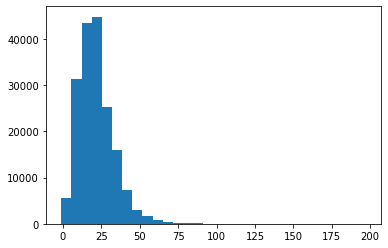

In [123]:
# Lets look at the distribution of sentence lengths
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins = 30);

In [124]:
# vamos ver qual a length que cobre 95% dos dados
percentile = int(np.percentile(sent_lens,96))
percentile

44

### Tokenization
<br>
Este pacote do tf faz 3 coisas:
<br>

- mete tudo em low case, e remove pontuação (standardize)
<br>
- divide tudo por palavras
<br>
- recombina string em ngrams (grupos de tokes (palavras))
<br>
- associa um valor único a cada token (indexing)
<br>
- transforma cada sample usando estes indíces num vector de floats ou ints

In [125]:
from tensorflow.keras.layers import TextVectorization

# foi o vocab_size utilizado no paper
VOCAB_SIZE = 68000


vect_text = TextVectorization(max_tokens = VOCAB_SIZE, # len do vocabulário, none deixa o algo descubrir a len dos dados passados ao algo
                              output_sequence_length = percentile, # padds each sequence to the longest sequence
                             )

In [126]:
vect_text.adapt(train_sentences)

In [127]:
# Test it on random sentences 
import random 
target_sentences = random.choice(train_sentences)
print(f'Original text {target_sentences} \n')
print(f'Vectorized text {vect_text([target_sentences])}')

Original text Transcranial direct current stimulation with physical training increased gait velocity  mean    , SD    p    and improved balance  pull test  mean    , SD    p    compared with transcranial direct current stimulation alone .
 

Vectorized text [[ 2501   982   359   465     7   189   155    96  1222  1462    57   357
     14     3   170   900 15546   128    57   357    14    34     7  2501
    982   359   465   271     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]]


In [128]:
# Let's look at the vocab we have in train data:
rtc_20k_vocab = vect_text.get_vocabulary()
print(f'Number of total words we have: {len(rtc_20k_vocab)}')
print(f'The most common words are: {rtc_20k_vocab[:5]}')
print(f'The least common words are: {rtc_20k_vocab[-5:]}')

Number of total words we have: 64841
The most common words are: ['', '[UNK]', 'the', 'and', 'of']
The least common words are: ['aainduced', 'aaigroup', 'aachener', 'aachen', 'aaacp']


### Embeeding
<br>
- The embeeding layer learns word correlations and puts it in the representation. It takes integers as input, meaning we feed the tokenized version of the words into the embedding layer.
<br>
- Parâmetros importantes:
<br>

*  `input_dim` = size of vocab
<br>
* `output_dim` = size of the representation vector
<br>
* `input_length` = length of seq being passed to embeeding layer

In [129]:
from tensorflow.keras import layers
VOCAB_SIZE = 68000 
max_length = percentile

embedding = layers.Embedding(input_dim = VOCAB_SIZE,
                            output_dim = 128,
                            input_length = max_length,
                            mask_zero = True, # Ajuda o Tf a ser mais eficiente para nao perder tempo com muitos 0's que veem do padding 
                            name = 'token_embedding'
                            )

In [130]:
target_sentences = random.choice(train_sentences)
print(f'Original text {target_sentences} \n')
vected_sentence = vect_text([target_sentences])
print(f'Vectorized text {vected_sentence}')
embedded_sent = embedding(vected_sentence)
print(f'The embedded sentence is : {embedded_sent}')
print(f'The embedded sentence shape is  : {embedded_sent.shape}')

Original text Testing and training sessions were performed at Springfield College .
 

Vectorized text [[  574     3   155   416     9   153    15 34195  2114     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0]]
The embedded sentence is : [[[-0.02485536  0.03796024 -0.015799   ...  0.04773362  0.03784073
    0.00917114]
  [-0.02122103  0.04551179 -0.00940268 ... -0.00611877  0.02020892
   -0.02202402]
  [-0.03755075  0.00265771 -0.00473519 ...  0.01427256  0.00077883
    0.04041893]
  ...
  [ 0.03212552 -0.00636228 -0.02094147 ... -0.01899419  0.00784085
    0.0442807 ]
  [ 0.03212552 -0.00636228 -0.02094147 ... -0.01899419  0.00784085
    0.0442807 ]
  [ 0.03212552 -0.00636228 -0.02094147 ... -0.01899419  0.00784085
    0.0442807 ]]]
The embedded sentence shape is  : (1, 44, 128)


### Dataset Creation with tf.data API

In [131]:
class CFG:
    seed = 42
    batch = 64

In [132]:
# Vamos criar um dataset
def create_ds(sentences, labels):
    
    ds = tf.data.Dataset.from_tensor_slices((sentences, labels))
    # A ordem aqui é importante
    #ds = ds.shuffle(1024,seed=CFG.seed)
    
    AUTO = tf.data.experimental.AUTOTUNE
    ds = ds.batch(batch_size = CFG.batch, drop_remainder = False)
    # Reduz o tempo de ir buscar os dados com cpu 
    # Autotune implica que vai buscar o máximo de dados de uma vez que é possível
    ds = ds.prefetch(buffer_size=AUTO)
    
    return ds

In [133]:
# Usas OH encoded devido à Loss que vais usar mais à frente
train_ds = create_ds(train_sentences, train_labels_encoded_OH)
valid_ds = create_ds(valid_sentences, valid_labels_encoded_OH)
test_ds = create_ds(test_sentences, test_labels_encoded_OH)

In [134]:
train_ds

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [139]:
a,v = next((iter(train_ds)))
a[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'To investigate the efficacy of  weeks of daily lowdose oral prednisolone in improving pain , mobility , and systemic lowgrade inflammation in the short term and whether the effect would be sustained at  weeks in older adults with moderate to severe knee osteoarthritis  OA  .\n'>

In [84]:
def model_1():
    Input = layers.Input(shape = (1,), dtype = tf.string)
    
    text_vectores = vect_text(Input)
    embeding = embedding(text_vectores)
    
    x = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'swish')(embeding)
    x = layers.GlobalAveragePooling1D()(x)
    output = layers.Dense(5, activation = 'softmax')(x)
    
    model = tf.keras.Model(Input, output)
    
    LOSS = 'CategoricalCrossentropy'
    METRICS = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    OPT = tf.keras.optimizers.Adam(0.001)
    model.compile(loss = LOSS,
                optimizer = OPT,
                metrics = METRICS)
    
    return model

In [85]:
modelo_1 = model_1()
modelo_1.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 57)               0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 57, 128)          8704000   
                                                                 
 conv1d_4 (Conv1D)           (None, 57, 64)            41024     
                                                                 
 global_average_pooling1d_4   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_4 (Dense)             (None, 5)                 325 

In [86]:
history = modelo_1.fit(train_ds,
                    validation_data = valid_ds,
                    steps_per_epoch = int(0.1*len(train_ds)), # speed up trainin  
                    epochs = 3,
                    validation_steps = int(0.1*len(valid_ds)),
                   )

Epoch 1/3
281/281 [==============================] - 45s 150ms/step - loss: 1.0774 - accuracy: 0.5657 - precision: 0.8734 - recall: 0.2797 - val_loss: 0.7352 - val_accuracy: 0.7114 - val_precision: 0.8507 - val_recall: 0.5549
Epoch 2/3
281/281 [==============================] - 41s 145ms/step - loss: 0.6838 - accuracy: 0.7435 - precision: 0.8270 - recall: 0.6341 - val_loss: 0.6394 - val_accuracy: 0.7586 - val_precision: 0.8276 - val_recall: 0.6622
Epoch 3/3
281/281 [==============================] - 41s 147ms/step - loss: 0.6259 - accuracy: 0.7707 - precision: 0.8280 - recall: 0.6948 - val_loss: 0.6044 - val_accuracy: 0.7796 - val_precision: 0.8421 - val_recall: 0.7041


In [87]:
modelo_1.evaluate(test_ds)

471/471 [==============================] - 11s 23ms/step - loss: 0.6183 - accuracy: 0.7791 - precision: 0.8336 - recall: 0.7004


[0.6183381676673889,
 0.7791272401809692,
 0.8336361646652222,
 0.7003816366195679]

In [89]:
test_pred_probs = modelo_1.predict(test_ds)

471/471 [==============================] - 6s 12ms/step


In [91]:
test_pred = tf.argmax(test_pred_probs, axis = 1) # get the index of the highest value
test_pred

<tf.Tensor: shape=(30135,), dtype=int64, numpy=array([0, 2, 2, ..., 4, 4, 4], dtype=int64)>

In [96]:
model_1_results = calculate_results(test_labels_encoded, test_pred)
print(f'the model 1 results are {model_1_results}\n')
print(f'the baseline results are {baseline_results}')

the model 1 results are {'accuracy': 77.91272606603617, 'precision': 0.7758561735305876, 'recall': 0.7791272606603618, 'f1': 0.7764839534996377}

the baseline results are {'accuracy': 72.1832384482987, 'precision': 0.7835634520695112, 'recall': 0.7218323844829869, 'f1': 0.7447397336209445}


## Modelo 2 (Transfer Learning): Using a pretrained Embedding Layer from tf Hub

<br>

* Vamos usar o universal sentence encoder, embora o paper tenha usado Glove embeddings

In [97]:
USE_url = 'https://tfhub.dev/google/universal-sentence-encoder/4'

In [167]:
import tensorflow_hub as hub
# Se não meteres trainable nao vale a pena, o modelo fica muito pior, mas com um 
# embedding mais afinado o modelo fica bom , embora super lento
# demora 40 min a treinar
sentence_encoder_layer = hub.KerasLayer(USE_url,
                                        trainable = False,
                                        name = 'USE'
                                       )


In [102]:
random_sentence = random.choice(train_sentences)
print(random_sentence,'\n')
embeddings = sentence_encoder_layer([random_sentence])
print(f'the embedding shape : {embeddings.shape}\n')
#print(f'The embedding : {embeddings}')

Patients ' characteristics and infections were collected from hospital databases .
 

the embedding shape : (1, 512)



In [120]:
def model_2():
    # A shape tem de ser uma lista para entrar no USE
    Input = layers.Input(shape = [], dtype = tf.string)
    
    #text_vectores = vect_text(Input)
    embeding = sentence_encoder_layer(Input)
    print(embeding.shape)
    # Aqui nao podes usar Conv1D , pq este embedder cria um embedding por frase,
    # enquanto que o outro criava um embedding por palavra na frase
    #x = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'swish')(embeding)
    #x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation = 'swish')(embeding)
    output = layers.Dense(5, activation = 'softmax')(x)
    
    model = tf.keras.Model(Input, output)
    
    LOSS = 'CategoricalCrossentropy'
    METRICS = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    OPT = tf.keras.optimizers.Adam(0.001)
    model.compile(loss = LOSS,
                optimizer = OPT,
                metrics = METRICS)
    
    return model

In [121]:
modelo_2 = model_2()
modelo_2.summary()

(None, 512)
Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None,)]                 0         
                                                                 
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_11 (Dense)            (None, 128)               65664     
                                                                 
 dense_12 (Dense)            (None, 5)                 645       
                                                                 
Total params: 256,864,133
Trainable params: 256,864,133
Non-trainable params: 0
_________________________________________________________________


In [122]:
history = modelo_2.fit(train_ds,
                    validation_data = valid_ds,
                    steps_per_epoch = int(0.1*len(train_ds)), # speed up trainin  
                    epochs = 3,
                    validation_steps = int(0.1*len(valid_ds)),
                   )

Epoch 1/3
281/281 [==============================] - 780s 3s/step - loss: 0.7893 - accuracy: 0.6914 - precision_4: 0.8134 - recall_4: 0.5561 - val_loss: 0.5852 - val_accuracy: 0.7779 - val_precision_4: 0.8275 - val_recall_4: 0.7274
Epoch 2/3
281/281 [==============================] - 808s 3s/step - loss: 0.5666 - accuracy: 0.7894 - precision_4: 0.8261 - recall_4: 0.7488 - val_loss: 0.5391 - val_accuracy: 0.7886 - val_precision_4: 0.8323 - val_recall_4: 0.7493
Epoch 3/3
281/281 [==============================] - 819s 3s/step - loss: 0.5271 - accuracy: 0.8008 - precision_4: 0.8378 - recall_4: 0.7640 - val_loss: 0.4979 - val_accuracy: 0.8142 - val_precision_4: 0.8485 - val_recall_4: 0.7670


In [123]:
test_pred_probs = modelo_2.predict(test_ds)
test_pred = tf.argmax(test_pred_probs, axis = 1) # get the index of the highest value
model_2_results = calculate_results(test_labels_encoded, test_pred)
print(f'the model 1 results are {model_2_results}\n')
print(f'the baseline results are {model_1_results}')

471/471 [==============================] - 26s 52ms/step
the model 1 results are {'accuracy': 80.74332171893147, 'precision': 0.8072802705384735, 'recall': 0.8074332171893147, 'f1': 0.8070706622456532}

the baseline results are {'accuracy': 77.91272606603617, 'precision': 0.7758561735305876, 'recall': 0.7791272606603618, 'f1': 0.7764839534996377}


## Model3 will use character embeddings and a model similar to model 1:

<br>

* No paper eles usam uma combinaçao de token e character embedding (embedding de cada letra)
* Vamos criar um tokenizer a nível de character e depois um character embedder

In [124]:
def split_char(text):
    return " ".join(list(text)) # juntas o text com um espaço numa lista logo o tokenizer vai olhar para
    # uma letra de cada vez
split_char('agagagagag')

'a g a g a g a g a g'

In [126]:
train_chars = [split_char(sentence) for sentence in train_sentences]
test_chars = [split_char(sentence) for sentence in test_sentences]
valid_chars = [split_char(sentence) for sentence in valid_sentences]

In [127]:
# Vamos olhar para o avr char len e a sua dist, etc
char_lengths = [len(sentence) for sentence in train_sentences] # nao usando o split vais olhar para 
#a sentence a char level
mean_char = np.mean(char_lengths)
mean_char

150.3662574983337

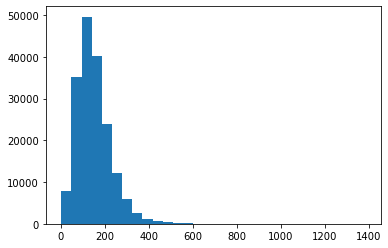

In [128]:
import matplotlib.pyplot as plt
plt.hist(char_lengths, bins = 30);

In [130]:
percentile_96 = np.percentile(char_lengths, 96)
percentile_96

305.0

In [132]:
# Qual o número max de vocab a char level ? o número de letras no alfabeto ? mas e as outras keyboard characters
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [134]:
MAX_CHAR_SIZE = len(alphabet) +2 # para espaço e OOV token

In [172]:
MAX_CHAR_SIZE

70

In [136]:
char_vectorizer = TextVectorization(max_tokens = MAX_CHAR_SIZE, # len do vocabulário, none deixa o algo descubrir a len dos dados passados ao algo
                              output_sequence_length = int(percentile_96), # padds each sequence to the longest sequence
                             )

In [142]:
char_vectorizer.adapt(train_chars)

In [143]:
# Check car vocab stats
char_vocab = char_vectorizer.get_vocabulary()
print(f'Number of total words we have: {len(char_vocab)}')
print(f'The most common words are: {char_vocab[:5]}')
print(f'The least common words are: {char_vocab[-5:]}')

Number of total words we have: 28
The most common words are: ['', '[UNK]', 'e', 't', 'i']
The least common words are: ['k', 'x', 'z', 'q', 'j']


In [146]:
random_chars = random.choice(train_chars)
print(f'Char text : {random_chars}\n')
vected_chars = char_vectorizer(random_chars)
print(f'Vectorized chars: {vected_chars}\n')
print(f'Vectorized chars shape: {vected_chars.shape}')

Char text : O u r   o b j e c t i v e   w a s   t o   t e s t   w h e t h e r   v i t a m i n   D   s u p p l e m e n t a t i o n   i n c r e a s e s   m u s c l e   s t r e n g t h   a n d   p o w e r   c o m p a r e d   w i t h   p l a c e b o   . 


Vectorized chars: [ 7 16  8  7 22 27  2 11  3  4 21  2 20  5  9  3  7  3  2  9  3 20 13  2
  3 13  2  8 21  4  3  5 15  4  6 10  9 16 14 14 12  2 15  2  6  3  5  3
  4  7  6  4  6 11  8  2  5  9  2  9 15 16  9 11 12  2  9  3  8  2  6 18
  3 13  5  6 10 14  7 20  2  8 11  7 15 14  5  8  2 10 20  4  3 13 14 12
  5 11  2 22  7  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

In [147]:
# Create char level embedding layer
char_embed = layers.Embedding(input_dim = MAX_CHAR_SIZE,
                            output_dim = 25,# é o valor usado no paper
                            mask_zero = True, # Ajuda o Tf a ser mais eficiente para nao perder tempo com muitos 0's que veem do padding 
                            name = 'char_embedding'
                            )

In [149]:
random_chars = random.choice(train_chars)
print(f'Original text {random_chars} \n')
vected_chars = char_vectorizer([random_chars])
print(f'Vectorized text {vected_chars}')
embedded_char = char_embed(vected_chars)
print(f'The embedded sentence is : {embedded_char}')
print(f'The embedded sentence shape is  : {embedded_char.shape}')

Original text T h e   s t u d y   s h o u l d   p r o v i d e   i m p o r t a n t   i n f o r m a t i o n   o n   t h e   W H O   m h G A P   i n t e r v e n t i o n   g u i d e   t o   a d d   t o   t h e   g r o w i n g   e v i d e n c e   b a s e   o f   i t s   i m p l e m e n t a t i o n   . 
 

Vectorized text [[ 3 13  2  9  3 16 10 19  9 13  7 16 12 10 14  8  7 21  4 10  2  4 15 14
   7  8  3  5  6  3  4  6 17  7  8 15  5  3  4  7  6  7  6  3 13  2 20 13
   7 15 13 18  5 14  4  6  3  2  8 21  2  6  3  4  7  6 18 16  4 10  2  3
   7  5 10 10  3  7  3 13  2 18  8  7 20  4  6 18  2 21  4 10  2  6 11  2
  22  5  9  2  7 17  4  3  9  4 15 14 12  2 15  2  6  3  5  3  4  7  6  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0

In [161]:
def model_3():
    Input = layers.Input(shape = (1,), dtype = tf.string)
    
    text_vectores = char_vectorizer(Input)
    embeding = char_embed(text_vectores)
    
    x = layers.Conv1D(64, kernel_size = 50, padding = 'same', activation = 'swish')(embeding)
    # Mudar de Avr para MAx dá um grande boost aos resultados
    x = layers.GlobalMaxPooling1D()(x)
    output = layers.Dense(5, activation = 'softmax')(x)
    
    model = tf.keras.Model(Input, output)
    
    LOSS = 'CategoricalCrossentropy'
    METRICS = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    OPT = tf.keras.optimizers.Adam(0.001)
    model.compile(loss = LOSS,
                optimizer = OPT,
                metrics = METRICS)
    
    return model

In [162]:
modelo_3 = model_3()
modelo_3.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_17 (InputLayer)       [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 305)              0         
 ectorization)                                                   
                                                                 
 char_embedding (Embedding)  (None, 305, 25)           1750      
                                                                 
 conv1d_9 (Conv1D)           (None, 305, 64)           80064     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_15 (Dense)            (None, 5)                 325

In [163]:
train_ds = create_ds(train_chars, train_labels_encoded_OH)
valid_ds = create_ds(valid_chars, valid_labels_encoded_OH)
test_ds = create_ds(test_chars, test_labels_encoded_OH)

In [164]:
history = modelo_3.fit(train_ds,
                    validation_data = valid_ds,
                    steps_per_epoch = int(0.1*len(train_ds)), # speed up trainin  
                    epochs = 3,
                    validation_steps = int(0.1*len(valid_ds)),
                   )

Epoch 1/3
281/281 [==============================] - 63s 220ms/step - loss: 1.2819 - accuracy: 0.4726 - precision_7: 0.6770 - recall_7: 0.2235 - val_loss: 1.1773 - val_accuracy: 0.5206 - val_precision_7: 0.6949 - val_recall_7: 0.3112
Epoch 2/3
281/281 [==============================] - 55s 196ms/step - loss: 1.1461 - accuracy: 0.5294 - precision_7: 0.7006 - recall_7: 0.3541 - val_loss: 1.0944 - val_accuracy: 0.5628 - val_precision_7: 0.7109 - val_recall_7: 0.3883
Epoch 3/3
281/281 [==============================] - 59s 209ms/step - loss: 1.0750 - accuracy: 0.5693 - precision_7: 0.7217 - recall_7: 0.4051 - val_loss: 1.0268 - val_accuracy: 0.5828 - val_precision_7: 0.7467 - val_recall_7: 0.4086


In [165]:
test_pred_probs = modelo_3.predict(test_ds)
test_pred = tf.argmax(test_pred_probs, axis = 1) # get the index of the highest value
model_3_results = calculate_results(test_labels_encoded, test_pred)
print(f'the model 1 results are {model_3_results}\n')
print(f'the baseline results are {model_2_results}')

471/471 [==============================] - 25s 53ms/step
the model 1 results are {'accuracy': 58.18151650904264, 'precision': 0.5701949892861935, 'recall': 0.5818151650904264, 'f1': 0.5722666871474441}

the baseline results are {'accuracy': 80.74332171893147, 'precision': 0.8072802705384735, 'recall': 0.8074332171893147, 'f1': 0.8070706622456532}


## Modelo 4 : é uma combinação dos modelos 2 e 3 (com token e char embeddings)

In [185]:
def model_4():
    token_input = layers.Input(shape = [], dtype = tf.string)
    #print('token input shape ', token_input.shape)
    token_embeddings = sentence_encoder_layer(token_input)
    #print('token embedd shape ', token_embeddings.shape)
    token_output = layers.Dense(128, activation = 'relu')(token_embeddings)
    #print('final token shapes  ',token_output.shape)
    
    char_input = layers.Input(shape = (1,), dtype = tf.string)
    #print('char input shape ', char_input.shape)
    char_vectores = char_vectorizer(char_input)
    char_embedding = char_embed(char_vectores)
    #print('char embedd shape ', char_embedding.shape)
    x = layers.Bidirectional(layers.LSTM(24, return_sequences = False))(char_embedding)
    #x = layers.Conv1D(64, kernel_size = 50, padding = 'same', activation = 'swish')(char_embeding)
    #x = layers.GlobalMaxPooling1D()(x)
    #print('final char shape  ', x.shape)
    
    concat = layers.Concatenate()([token_output, x])
    #print(concat.shape)
    
    #y = layers.Bidirectional(layers.LSTM(24, return_sequences = False))(concat)
    
    dropout = layers.Dropout(0.5)(concat)
    y = layers.Dense(64, activation = 'swish')(dropout)
    y = layers.Dropout(0.5)(y)
    output = layers.Dense(5, activation = 'softmax')(y)
    
    model = tf.keras.Model(inputs= [token_input,char_input], outputs = output)
    
    LOSS = 'CategoricalCrossentropy'
    METRICS = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    OPT = tf.keras.optimizers.Adam(0.001)
    model.compile(loss = LOSS,
                optimizer = OPT,
                metrics = METRICS)
    
    return model

In [186]:
modelo_4 = model_4()
modelo_4.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_35 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_34 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 305)         0           ['input_35[0][0]']               
 orization)                                                                                       
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   ['input_34[0][0]']        

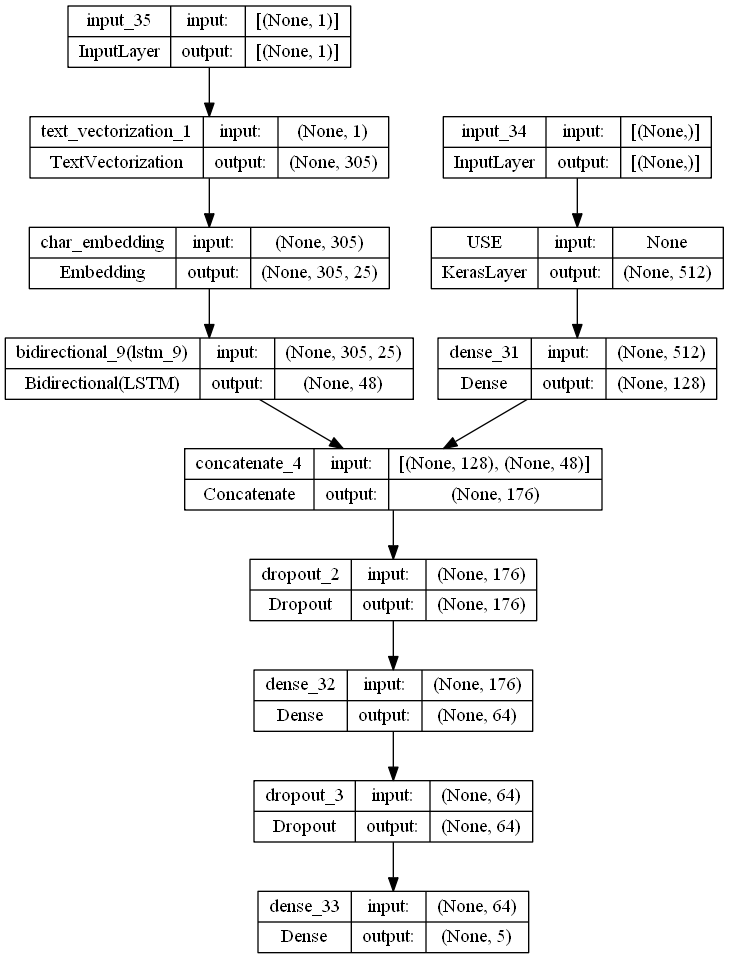

In [190]:
from keras.utils import plot_model
plot_model(modelo_4, show_shapes = True)

In [197]:
# Vamos criar um dataset
def create_ds(sentences, characters,labels):
    
    #ds = tf.data.Dataset.from_tensor_slices(((sentences,characters), labels))
    
    # outra forma de fazê-lo
    data = tf.data.Dataset.from_tensor_slices((sentences,characters))
    labels = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((data,labels))
    
    AUTO = tf.data.experimental.AUTOTUNE
    ds = ds.batch(batch_size = CFG.batch, drop_remainder = False)
    # Reduz o tempo de ir buscar os dados com cpu 
    # Autotune implica que vai buscar o máximo de dados de uma vez que é possível
    ds = ds.prefetch(buffer_size=AUTO)
    
    return ds

In [198]:
train_ds = create_ds(train_sentences,train_chars, train_labels_encoded_OH)
test_ds = create_ds(test_sentences,test_chars, test_labels_encoded_OH)
valid_ds = create_ds(valid_sentences,valid_chars, valid_labels_encoded_OH)

In [199]:
train_ds

<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [200]:
history = modelo_4.fit(train_ds,
                    validation_data = valid_ds,
                    steps_per_epoch = int(0.1*len(train_ds)), # speed up trainin  
                    epochs = 3,
                    validation_steps = int(0.1*len(valid_ds)),
                   )

Epoch 1/3
281/281 [==============================] - 150s 424ms/step - loss: 1.0460 - accuracy: 0.5848 - precision_9: 0.7734 - recall_9: 0.3736 - val_loss: 0.8089 - val_accuracy: 0.6828 - val_precision_9: 0.7948 - val_recall_9: 0.5319
Epoch 2/3
281/281 [==============================] - 100s 356ms/step - loss: 0.8294 - accuracy: 0.6804 - precision_9: 0.7692 - recall_9: 0.5462 - val_loss: 0.7538 - val_accuracy: 0.7061 - val_precision_9: 0.8007 - val_recall_9: 0.5864
Epoch 3/3
281/281 [==============================] - 96s 343ms/step - loss: 0.8038 - accuracy: 0.6892 - precision_9: 0.7797 - recall_9: 0.5821 - val_loss: 0.7254 - val_accuracy: 0.7231 - val_precision_9: 0.8040 - val_recall_9: 0.6124


In [201]:
test_pred_probs = modelo_4.predict(test_ds)
test_pred = tf.argmax(test_pred_probs, axis = 1) # get the index of the highest value
model_4_results = calculate_results(test_labels_encoded, test_pred)
print(f'the model 1 results are {model_4_results}\n')
print(f'the baseline results are {model_2_results}')

471/471 [==============================] - 62s 113ms/step
the model 1 results are {'accuracy': 71.335656213705, 'precision': 0.7124123510267901, 'recall': 0.7133565621370499, 'f1': 0.7093777694905595}

the baseline results are {'accuracy': 80.74332171893147, 'precision': 0.8072802705384735, 'recall': 0.8074332171893147, 'f1': 0.8070706622456532}


In [202]:
print(f'the baseline results are {baseline_results}')

the baseline results are {'accuracy': 72.1832384482987, 'precision': 0.7835634520695112, 'recall': 0.7218323844829869, 'f1': 0.7447397336209445}


# Model 5 : same as 4 but with positional embeddings

In [203]:
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,12
1,1,METHODS,A total of @ patients with primary knee OA wer...,12
2,2,METHODS,Outcome measures included pain reduction and i...,12
3,3,METHODS,Pain was assessed using the visual analog pain...,12
4,4,METHODS,Secondary outcome measures included the Wester...,12


<AxesSubplot:ylabel='Frequency'>

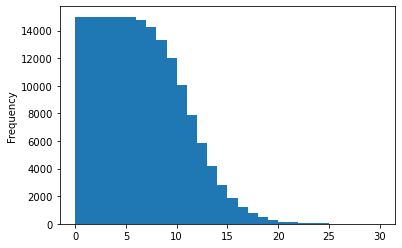

In [208]:
train_df.line_number.plot.hist(bins = 30)

In [213]:
# Usas one hot encoding , mas podes experimentar usar os dados com sao
train_line_number_one_hot = tf.one_hot(train_df['line_number'].to_numpy(), depth = 17)
test_line_number_one_hot = tf.one_hot(test_df['line_number'].to_numpy(), depth = 17)
valid_line_number_one_hot = tf.one_hot(valid_df['line_number'].to_numpy(), depth = 17)
train_line_number_one_hot[0], train_line_number_one_hot.shape

(<tf.Tensor: shape=(17,), dtype=float32, numpy=
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32)>,
 TensorShape([180040, 17]))

<AxesSubplot:ylabel='Frequency'>

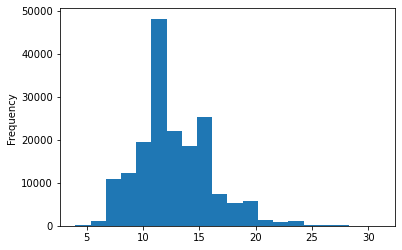

In [216]:
train_df.total_lines.plot.hist(bins = 20)

In [220]:
train_total_lines_one_hot = tf.one_hot(train_df['total_lines'].to_numpy(), depth = 20)
test_total_lines_one_hot = tf.one_hot(test_df['total_lines'].to_numpy(), depth = 20)
valid_total_lines_one_hot = tf.one_hot(valid_df['total_lines'].to_numpy(), depth = 20)
train_total_lines_one_hot[0], train_total_lines_one_hot.shape

(<tf.Tensor: shape=(20,), dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0.], dtype=float32)>,
 TensorShape([180040, 20]))

In [232]:
def model_5():
    
    # Token Inputs
    token_input = layers.Input(shape = [], dtype = tf.string)
    #print('token input shape ', token_input.shape)
    token_embeddings = sentence_encoder_layer(token_input)
    #print('token embedd shape ', token_embeddings.shape)
    token_output = layers.Dense(128, activation = 'relu')(token_embeddings)
    #print('final token shapes  ',token_output.shape)
    
    # Char Inputs
    char_input = layers.Input(shape = (1,), dtype = tf.string)
    #print('char input shape ', char_input.shape)
    char_vectores = char_vectorizer(char_input)
    char_embedding = char_embed(char_vectores)
    #print('char embedd shape ', char_embedding.shape)
    x = layers.Bidirectional(layers.LSTM(24, return_sequences = False))(char_embedding)

    # Token + Char combo
    concat = layers.Concatenate()([token_output, x])
    dropout = layers.Dropout(0.5)(concat)
    y = layers.Dense(64, activation = 'swish')(dropout)
    y = layers.Dropout(0.5)(y)
    
    # Positional Encoding 
    Positional_encoding = layers.Input(shape = (17,), dtype = tf.float32)
    k = layers.Dense(32, activation = 'swish')(Positional_encoding)
    
    # Line Number Encoding 
    Lines_encoding = layers.Input(shape = (20,), dtype = tf.float32)
    j = layers.Dense(32, activation = 'swish')(Lines_encoding)
    
    # Combine Embeddings
    embed_combo = layers.Concatenate()([k,j])
    #embed_combo = layers.Dropout(0.5)(embed_combo)
    # Final Combo
    final_combo = layers.Concatenate()([embed_combo, y])
    
    output = layers.Dense(5, activation = 'softmax')(final_combo)
    
    model = tf.keras.Model(inputs= [token_input,char_input,Positional_encoding ,Lines_encoding]
                           , outputs = output)
    
    LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2)
    METRICS = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    OPT = tf.keras.optimizers.Adam(0.001)
    model.compile(loss = LOSS,
                optimizer = OPT,
                metrics = METRICS)
    
    return model

In [233]:
modelo_5 = model_5()
modelo_5.summary()

Model: "model_15"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_45 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_44 (InputLayer)          [(None,)]            0           []                               
                                                                                                  
 text_vectorization_1 (TextVect  (None, 305)         0           ['input_45[0][0]']               
 orization)                                                                                       
                                                                                                  
 USE (KerasLayer)               (None, 512)          256797824   ['input_44[0][0]']        

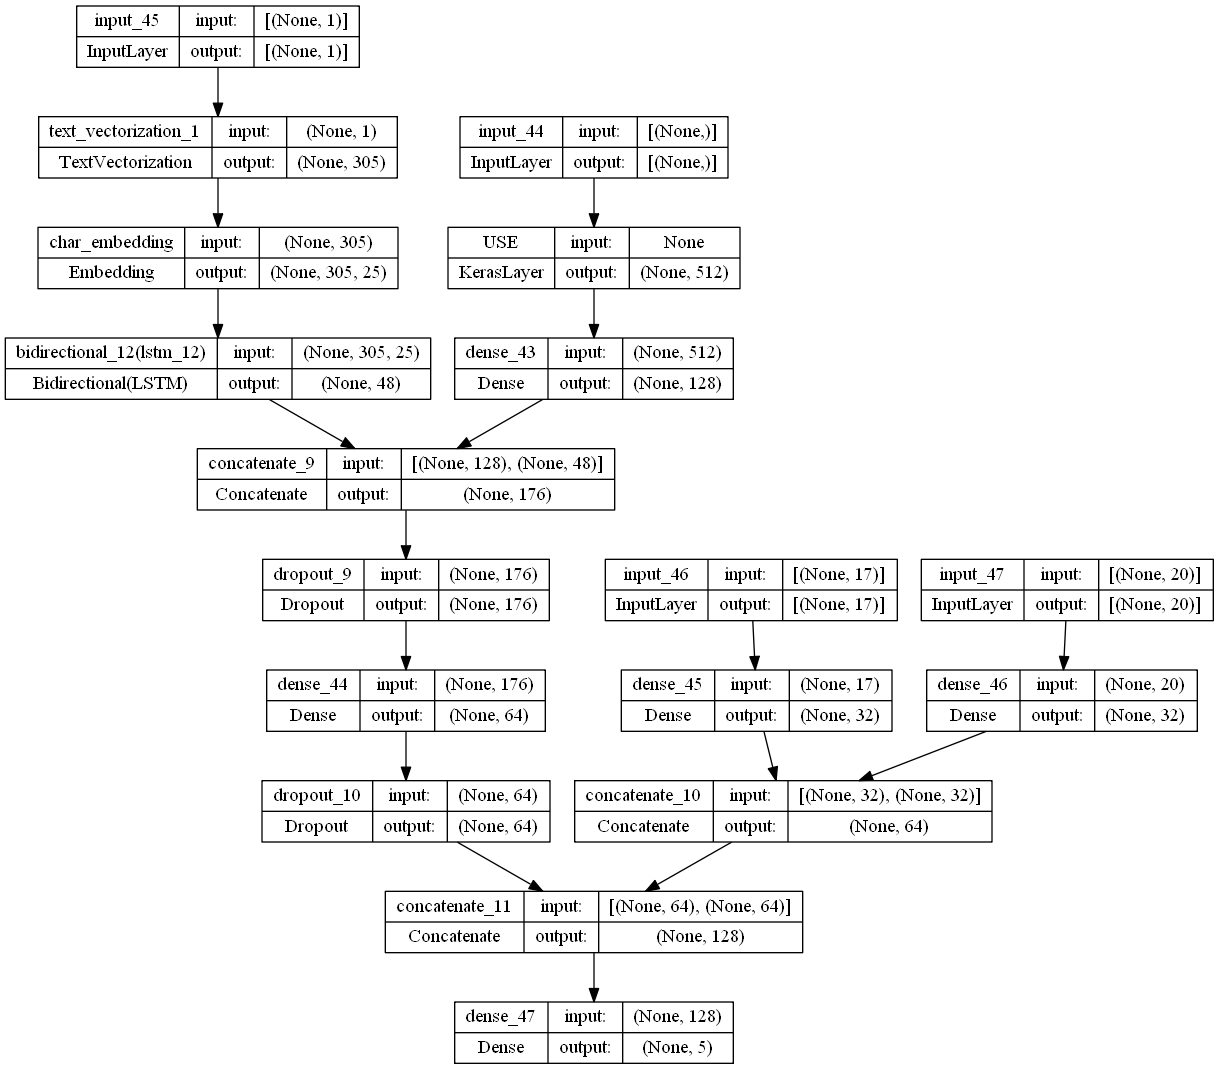

In [234]:
from keras.utils import plot_model
plot_model(modelo_5, show_shapes = True)

In [228]:
# Vamos criar um dataset
def create_ds(sentences, characters,positional_encoding,line_encoding,labels):
    
    #ds = tf.data.Dataset.from_tensor_slices(((sentences,characters), labels))
    
    # outra forma de fazê-lo
    data = tf.data.Dataset.from_tensor_slices((sentences,characters,positional_encoding,line_encoding))
    labels = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((data,labels))
    
    AUTO = tf.data.experimental.AUTOTUNE
    ds = ds.batch(batch_size = CFG.batch, drop_remainder = False)
    # Reduz o tempo de ir buscar os dados com cpu 
    # Autotune implica que vai buscar o máximo de dados de uma vez que é possível
    ds = ds.prefetch(buffer_size=AUTO)
    
    return ds

In [229]:
train_ds = create_ds(train_sentences,train_chars,train_line_number_one_hot ,train_total_lines_one_hot,train_labels_encoded_OH)
test_ds = create_ds(test_sentences,test_chars,test_line_number_one_hot ,test_total_lines_one_hot, test_labels_encoded_OH)
valid_ds = create_ds(valid_sentences,valid_chars,valid_line_number_one_hot ,valid_total_lines_one_hot, valid_labels_encoded_OH)

In [235]:
history = modelo_5.fit(train_ds,
                    validation_data = valid_ds,
                    steps_per_epoch = int(0.1*len(train_ds)), # speed up trainin  
                    epochs = 3,
                    validation_steps = int(0.1*len(valid_ds)),
                   )

Epoch 1/3
281/281 [==============================] - 126s 360ms/step - loss: 1.2039 - accuracy: 0.6540 - precision_11: 0.8693 - recall_11: 0.3378 - val_loss: 1.0190 - val_accuracy: 0.7876 - val_precision_11: 0.8879 - val_recall_11: 0.5662
Epoch 2/3
281/281 [==============================] - 96s 343ms/step - loss: 1.0118 - accuracy: 0.7885 - precision_11: 0.8773 - recall_11: 0.6113 - val_loss: 0.9758 - val_accuracy: 0.8052 - val_precision_11: 0.8892 - val_recall_11: 0.6616
Epoch 3/3
281/281 [==============================] - 92s 326ms/step - loss: 0.9901 - accuracy: 0.7981 - precision_11: 0.8805 - recall_11: 0.6536 - val_loss: 0.9628 - val_accuracy: 0.8095 - val_precision_11: 0.8933 - val_recall_11: 0.6735


In [236]:
test_pred_probs = modelo_5.predict(test_ds)
test_pred = tf.argmax(test_pred_probs, axis = 1) # get the index of the highest value
model_5_results = calculate_results(test_labels_encoded, test_pred)
print(f'the model 1 results are {model_5_results}\n')
print(f'the baseline results are {model_2_results}')

471/471 [==============================] - 59s 109ms/step
the model 1 results are {'accuracy': 80.73336651733865, 'precision': 0.8067601092831316, 'recall': 0.8073336651733864, 'f1': 0.8053815616209449}

the baseline results are {'accuracy': 80.74332171893147, 'precision': 0.8072802705384735, 'recall': 0.8074332171893147, 'f1': 0.8070706622456532}


# Model 6 : Model 1 with positional encoding 

In [282]:
def model_6():
    
    # Token Inputs
    token_input = layers.Input(shape = (1,), dtype = tf.string)
    text_vectores = vect_text(token_input)
    embeding = embedding(text_vectores)
    print(embeding.shape)
    x = layers.Conv1D(64, kernel_size = 5, padding = 'same', activation = 'swish')(embeding)
    print(x.shape)
    x = layers.GlobalAveragePooling1D()(x)
    print(x.shape)
    #dropout = layers.Dropout(0.5)(x)
    y = layers.Dense(64, activation = 'swish')(x)
    y = layers.Dropout(0.5)(y)
    
    # Positional Encoding 
    Positional_encoding = layers.Input(shape = (17,), dtype = tf.float32)
    k = layers.Dense(32, activation = 'swish')(Positional_encoding)
    
    # Line Number Encoding 
    Lines_encoding = layers.Input(shape = (20,), dtype = tf.float32)
    j = layers.Dense(32, activation = 'swish')(Lines_encoding)
    
    # Combine Embeddings
    embed_combo = layers.Concatenate()([k,j])
    #embed_combo = layers.Dropout(0.5)(embed_combo)
    # Final Combo
    final_combo = layers.Concatenate()([embed_combo, y])
    
    output = layers.Dense(5, activation = 'softmax')(final_combo)
    
    model = tf.keras.Model(inputs= [token_input,Positional_encoding ,Lines_encoding]
                           , outputs = output)
    
    LOSS = tf.keras.losses.CategoricalCrossentropy(label_smoothing = 0.2)
    METRICS = ['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    OPT = tf.keras.optimizers.Adam(0.001)
    model.compile(loss = LOSS,
                optimizer = OPT,
                metrics = METRICS)
    
    return model

In [241]:
# Vamos criar um dataset
def create_ds(sentences,positional_encoding,line_encoding,labels):
    
    #ds = tf.data.Dataset.from_tensor_slices(((sentences,characters), labels))
    
    # outra forma de fazê-lo
    data = tf.data.Dataset.from_tensor_slices((sentences,positional_encoding,line_encoding))
    labels = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((data,labels))
    
    AUTO = tf.data.experimental.AUTOTUNE
    ds = ds.batch(batch_size = CFG.batch, drop_remainder = False)
    # Reduz o tempo de ir buscar os dados com cpu 
    # Autotune implica que vai buscar o máximo de dados de uma vez que é possível
    ds = ds.prefetch(buffer_size=AUTO)
    
    return ds

In [242]:
train_ds = create_ds(train_sentences,train_line_number_one_hot ,train_total_lines_one_hot,train_labels_encoded_OH)
test_ds = create_ds(test_sentences,test_line_number_one_hot ,test_total_lines_one_hot, test_labels_encoded_OH)
valid_ds = create_ds(valid_sentences,valid_line_number_one_hot ,valid_total_lines_one_hot, valid_labels_encoded_OH)

In [283]:
modelo_6 = model_6()
plot_model(modelo_6, show_shapes = True)

(None, 44, 128)
(None, 44, 64)
(None, 64)


NameError: name 'plot_model' is not defined

In [270]:
history = modelo_6.fit(train_ds,
                    validation_data = valid_ds,
                    steps_per_epoch = int(0.1*len(train_ds)), # speed up trainin  
                    epochs = 3,
                    validation_steps = int(0.1*len(valid_ds)),
                   )

Epoch 1/3
281/281 [==============================] - 119s 421ms/step - loss: 1.1017 - accuracy: 0.7377 - precision_14: 0.9298 - recall_14: 0.4538 - val_loss: 0.9794 - val_accuracy: 0.8122 - val_precision_14: 0.9122 - val_recall_14: 0.6390
Epoch 2/3
281/281 [==============================] - 112s 399ms/step - loss: 0.9353 - accuracy: 0.8469 - precision_14: 0.9205 - recall_14: 0.7196 - val_loss: 0.9408 - val_accuracy: 0.8314 - val_precision_14: 0.9062 - val_recall_14: 0.7194
Epoch 3/3
281/281 [==============================] - 106s 376ms/step - loss: 0.9138 - accuracy: 0.8607 - precision_14: 0.9219 - recall_14: 0.7580 - val_loss: 0.9350 - val_accuracy: 0.8314 - val_precision_14: 0.9060 - val_recall_14: 0.7114


In [271]:
test_pred_probs = modelo_6.predict(test_ds)
test_pred = tf.argmax(test_pred_probs, axis = 1) # get the index of the highest value
model_6_results = calculate_results(test_labels_encoded, test_pred)
print(f'the model 1 results are {model_6_results}\n')
print(f'the baseline results are {model_5_results}')

471/471 [==============================] - 19s 40ms/step
the model 1 results are {'accuracy': 83.42790774846523, 'precision': 0.8347751401032959, 'recall': 0.8342790774846524, 'f1': 0.8324093845252136}

the baseline results are {'accuracy': 80.73336651733865, 'precision': 0.8067601092831316, 'recall': 0.8073336651733864, 'f1': 0.8053815616209449}


# Save our best model

In [273]:
modelo_6.save("my_best_nlp_model")

INFO:tensorflow:Assets written to: my_best_nlp_model\assets


INFO:tensorflow:Assets written to: my_best_nlp_model\assets


In [274]:
loaded_model = tf.keras.models.load_model('my_best_nlp_model')


# Transformers with Pytorch

In [539]:
train_df.head()

,line_number,target,text,total_lines
0,0,OBJECTIVE,To investigate the efficacy of weeks of daily...,12
1,1,METHODS,A total of patients with primary knee OA were...,12
2,2,METHODS,Outcome measures included pain reduction and i...,12
3,3,METHODS,Pain was assessed using the visual analog pain...,12
4,4,METHODS,Secondary outcome measures included the Wester...,12


In [540]:
#torch libs
import torch
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader, Dataset
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [541]:
#remove special chars
import string
exclude = list(string.punctuation)#set of all special chars
del exclude[13]
del exclude[11]

In [542]:
%%time
#remove all the special chars
train_df['text'] = train_df.text.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
test_df['text'] = test_df.text.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
valid_df['text'] = valid_df.text.apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

Wall time: 1min 5s


In [543]:
train_sentences = train_df['text'].to_list()
test_sentences = test_df['text'].to_list()
valid_sentences = valid_df['text'].to_list()

## Creating pytorch dataset in two phases:
<br>

- **First** we need to create a vocabulary, and a mapping that takes gets word to and index and vice versa (tokenization process).
<br>
- **Second** we build the pytorch datasets

In [544]:
sent_lens = [len(sentences.split()) -1 for sentences in train_sentences]
avg_sentence_length = np.mean(sent_lens)
std_sentence_length = np.std(sent_lens)
avg_sentence_length, std_sentence_length

(21.6123028215952, 11.371616908974437)

In [545]:
percentile_96 = np.percentile(sent_lens, 96)
percentile_96

44.0

# **CONFIGURATIONS!!!!**

In [613]:
def padder(vec ,max_len = CFG.padding):
    if (len(vec) > max_len):
        return vec[:max_len]
    elif(len(vec) == max_len):
        return vec
    else:
        diff = max_len - len(vec)
        return vec+diff*[0]

class CFG:
    DEBUG = True
    freq = 2
    max_vocab_size = 68000
    text = 'text'
    target = 'target'
    Trans = padder
    padding = int(percentile_96)
    batch_size = 32
    pad_index = 0
    filters = 16
    VOCAB_SIZE = 68000 
    embedding_dim = 128

In [547]:

#######################################################
#               Define Vocabulary Class
#######################################################
class Vocabulary:
  
    '''
    __init__ to  initiate our vocab dictionaries
    '''
    def __init__(self, freq_threshold = 2, max_size = 68000):
        '''
        freq_threshold : the minimum times a word must occur in corpus to be treated in vocab
        max_size : max source vocab size. Eg. if set to 10,000, we pick the top 10,000 most frequent
        words and discard others
        '''
        #initiate the index to token dict
        ## <PAD> -> padding, used for padding the shorter sentences in a batch to match the
        # length of longest sentence in the batch
        ## <SOS> -> start token, added in front of each sentence to signify the start of sentence
        ## <EOS> -> End of sentence token, added to the end of each sentence to signify the end of 
        #sentence
        ## <UNK> -> words which are not found in the vocab are replace by this token
        self.itos = {0: '<PAD>', 1:'<SOS>', 2:'<EOS>', 3: '<UNK>'}
        
        #initiate the token to index dict
        self.stoi = {k:j for j,k in self.itos.items()} 
        
        self.freq_threshold = freq_threshold
        self.max_size = max_size
    
    '''
    __len__ is used by dataloader later to create batches
    '''
    def __len__(self):
        return len(self.itos)
    
    '''
    a simple tokenizer to split on space and converts the sentence to list of words
    '''
    
    def tokenizer(self,text):
        return [tok.lower().strip() for tok in text.split(' ')]
    
    '''
    build the vocab: create a dictionary mapping of index to string (itos) and string to index (stoi)
    output ex. for stoi -> {'the':5, 'a':6, 'an':7}
    '''
    def build_vocabulary(self, sentence_list):
        #calculate the frequencies of each word first to remove the words with freq < freq_threshold
        frequencies = {}  #init the freq dict
        idx = 4 #index from which we want our dict to start. We already used 4 indexes for pad, start, end, unk
        
        #calculate freq of words
        for sentence in sentence_list:
            
            for word in self.tokenizer(str(sentence)):
                if word not in frequencies.keys():
                    frequencies[word]=1
                else:
                    frequencies[word]+=1
                    
                    
        #limit vocab by removing low freq words
        frequencies = {k:v for k,v in frequencies.items() if v>self.freq_threshold} 
        
        #limit vocab to the max_size specified
        frequencies = dict(sorted(frequencies.items(), key = lambda x: -x[1])[:self.max_size-idx]) 
        # pq usas idx =4 for pad, start, end , unk
            
        #create vocab
        for word in frequencies.keys():
            self.stoi[word] = idx
            self.itos[idx] = word
            idx+=1
            
    '''
    convert the list of words to a list of corresponding indexes
    '''    
    def numericalize(self, text):
        #tokenize text
        tokenized_text = self.tokenizer(text)
        numericalized_text = []
        for token in tokenized_text:
            if token in self.stoi.keys():
                numericalized_text.append(self.stoi[token])
            else: #out-of-vocab words are represented by UNK token index
                numericalized_text.append(self.stoi['<UNK>'])
                
        return numericalized_text

In [548]:
test_sentences[0]

'This study analyzed liver function abnormalities in heart failure patients admitted with severe acute decompensated heart failure  ADHF  .\n'

In [549]:
test_vocab = Vocabulary(freq_threshold = 2, max_size = 68000)

test_vocab.build_vocabulary(test_sentences)

#print('index to string: ',test_vocab.itos)
#print('string to index:',test_vocab.stoi)

print('numericalize -> cat and a dog: ', test_vocab.numericalize('cat and a dog'))

numericalize -> cat and a dog:  [10259, 8, 13, 3]


In [550]:
##########################
#   Create Dataset Class
##########################
from sklearn.preprocessing import OneHotEncoder



class Create_Dataset(Dataset):
    '''
    df : dataframe
    source_column : the column with the text
    target_column : Column with the target
    transform : for possible augmentations
    freq_threshold: minimum amount of times a word needs to be appear in the corpus to be considered for vocab
    max_vocab_size : self explanatory
    '''
    
    def __init__(self, df, source_column = CFG.text, target_column = CFG.target, transform = CFG.Trans,
                freq_threshold = CFG.freq , max_vocab_size = CFG.max_vocab_size):
        
        self.df = df
        self.transform = transform
        self.source_texts = self.df[source_column]
        self.target_classes = self.df[target_column]
        
        ## Create Vocab for source_text
        # Iniciar vocab instance
        self.source_vocab = Vocabulary(freq_threshold,max_vocab_size)
        self.source_vocab.build_vocabulary(self.source_texts.tolist())

        #self.label_encoder =  LabelEncoder()
        self.label_encoder = OneHotEncoder(sparse = False) 
        self.label_encoder.fit(self.target_classes.unique().reshape(-1,1))
        self.classes = len(self.target_classes.unique())
    def __len__(self):
        return len(self.df)
    
    # Isto vai-te buscar automaticamente uma linha do df e transforma-a em tokens + target
    # não precisas de inicializar, podes apenas chamar o objecto e ver o seu índice
    
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        target_classes = self.target_classes[index]
        
        # tokenize texts ['<SOS>','hello','how','are','you','<EOS>'] -> [1,11,123,1232,21,2]
        tokenized_source = [self.source_vocab.stoi["<SOS>"]]
        tokenized_source += self.source_vocab.numericalize(source_text)
        tokenized_source.append(self.source_vocab.stoi['<EOS>'])
        
        # tokenize targets
        train_labels_encoded = self.label_encoder.transform(np.array([target_classes]).reshape(-1, 1))
        
        if self.transform is not None:
            tokenized_source = self.transform(tokenized_source)
        
        
        return torch.tensor(tokenized_source), torch.tensor(train_labels_encoded[0])

In [551]:
testing_dataset = Create_Dataset(df = test_df)
testing_dataset[1]

(tensor([   1,   13,  721, 2011,  100,   15,  191,   12,    7,   82,    9,  115,
           31,    7,  382,   22,    9, 3990,  240,  305,    8,  561,  562, 3106,
          253,    4, 9082,    4,    6,    2,    0,    0,    0,    0,    0,    0,
            0,    0,    0,    0,    0,    0,    0,    0]),
 tensor([0., 0., 0., 0., 1.], dtype=torch.float64))

In [552]:
%%time
train_ds = Create_Dataset(df = train_df)

Wall time: 7.57 s


##### The problem is that we are creating a vocab for each corpus, and in the test and val corpus we have less words, we thus create another class for these, that will inherit the train vocab:

In [553]:
class Valid_test_ds:
    def __init__(self, train_ds, df, source_column = CFG.text, 
                 target_column = CFG.target, transform = CFG.Trans):
        self.df = df
        self.transform = transform
        
        self.train_ds = train_ds
        
        self.source_texts = self.df[source_column]
        self.target_classes = self.df[target_column]
        
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        source_text = self.source_texts[index]
        target_classe = self.target_classes[index]
        
        
        # tokenize texts ['<SOS>','hello','how','are','you','<EOS>'] -> [1,11,123,1232,21,2]
        tokenized_source = [self.train_ds.source_vocab.stoi["<SOS>"]]
        tokenized_source += self.train_ds.source_vocab.numericalize(source_text)
        tokenized_source.append(self.train_ds.source_vocab.stoi['<EOS>'])
        
        # tokenize targets
        labels_encoded = self.train_ds.label_encoder.transform(np.array([target_classe]).reshape(-1, 1))
        
        if self.transform is not None:
            tokenized_source = self.transform(tokenized_source)
        
        return torch.tensor(tokenized_source), torch.tensor(labels_encoded[0])

In [554]:
valid_ds = Valid_test_ds(train_ds,df = valid_df)
test_ds = Valid_test_ds(train_ds,df = test_df)

In [555]:
valid_ds[1][0]

tensor([   1,  191,   25,   36, 1550,  186,  116,   17,  500,  403,   32, 9623,
          24,    6,    2,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])

In [556]:
valid_df['text'][1],valid_df['target'][1]

('It is not clear whether these patients would benefit from antifungal treatment .\n',
 'BACKGROUND')

### Create Dataloaders:
<br>

- Note on dataloaders: we will use collate fn. This function runs AFTER the batch has been created using dataloader. We use this function to create paddings in our batch. Para tal usamos "pad_sequence" que vem de torch.nn.utils.rnn , que escolhe a frase mais longa e depois utiliza-a para padding.

In [557]:
#################
#O prob com este padder é que mete tudo ao max do batch size, e eu nao quero isso,
#por isso nao o uso por enquanto
# Além disso tb deixava a shape do data loader ao contrário como [22,32] em vez de [32,22]
# isto implicava que cada batch tinha um token de cada frase no batch, ex: o primeiro batch tinha 
# apenas 32 SOS tokens.... o que eu acho que não está correto
##################

class Padding:
    def __init__(self,pad_indx = CFG.pad_index):
        self.pad_indx = pad_indx
    # tal como getitem é um étodo de default
    # 1: objecto é criado no DataLoader (mais à frente)
    # 2: se obj(batch) for chamado o call corre por defeito
    def __call__(self, batch):
        
        text_in_batch  = [item[0] for item in batch]
        #print(self.pad_indx)
        print(np.array(text_in_batch).shape)
        padded_text = pad_sequence(text_in_batch, batch_first= False, padding_value = self.pad_indx )
        
        target = [item[1] for item in batch]
        #usas stack pq o target é uma lista de tensores torch
       
        return padded_text, torch.stack(target)

In [558]:
################################
# Defining DataLoaders functions
################################

def get_train_loader(dataset, batch_size = CFG.batch_size, num_workers = 0, shuffle = True,
                    pin_memory = True):
    # PAD aqui é zero
    pad_indx = dataset.source_vocab.stoi['<PAD>']
    loader = DataLoader(dataset, batch_size = batch_size, num_workers = num_workers, 
                       shuffle = shuffle, pin_memory = pin_memory, collate_fn = None)
    
    return loader


def get_validation_loader(dataset,train_dataset, batch_size = CFG.batch_size, num_workers = 0, 
                          shuffle = True,
                          pin_memory = True):
    pad_indx = train_dataset.source_vocab.stoi['<PAD>']
    loader = DataLoader(dataset, batch_size = batch_size, num_workers = num_workers, 
                       shuffle = shuffle, pin_memory = pin_memory, collate_fn = None)
    
    return loader

In [559]:
train_dataLoader = get_train_loader(train_ds)
type(train_dataLoader.dataset)

__main__.Create_Dataset

In [560]:
text = next(iter(train_dataLoader))[0]
target = next(iter(train_dataLoader))[1]
text.shape, target.shape

(torch.Size([32, 44]), torch.Size([32, 5]))

In [561]:
valid_dataLoader = get_validation_loader(valid_ds,train_ds)
test_dataLoader = get_validation_loader(test_ds,train_ds)

# Moddeling with Pytorch:
<br>

* **Primeiro Modelo** - Rnn ou conv básico só para me familiarizar com o pytorch
<br>

* **Segundo Modelo** - Usar um transformer com Transfer Learning

In [562]:
from torch.nn import Module
from torch.nn import Conv1d
from torch.nn import ReLU
from torch.nn import LogSoftmax
from torch.nn import MaxPool1d
from torch import flatten
from torch.nn import AvgPool1d
from torch.nn import Linear
from torch.optim import Adam
from torch.nn import Embedding
from torchmetrics.classification import Accuracy
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import time
import warnings

In [ ]:
class Train_CFG:
    INIT_LR = 0.001
    BATCH = CFG.batch_size
    EPOCHS = 3
    #TRAIN_SPLIT = 0.8
    #VAL_SPLIT = 1-TRAIN_SPLIT

# Para tentar activar GPU se houver
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [614]:
# Module é para não usares sequential
# usas o module object para subclassing o que te permite:
# 1 reutilizar variáveis
# 2 implementar costum functions
# 3 definir a forward fucntion

class first_model(Module):
    
    def __init__(self, num_channels = CFG.embedding_dim, classes = 5, filters = CFG.filters, kernel_size = 10):
        super(first_model,self).__init__()
        
        self.embed = Embedding(CFG.VOCAB_SIZE, CFG.embedding_dim)
        # acho que in_channels é os canais de cor, neste caso 1, e out_channels é equivalente a filters
        self.conv1d = Conv1d(in_channels = num_channels, out_channels = filters, stride = 1,kernel_size = kernel_size)
        self.MaxPool1d = MaxPool1d(kernel_size = 4)
        self.flat = nn.Flatten(start_dim=1)
        self.Activation = ReLU()
        self.Dense = Linear(in_features = 128, out_features = classes)
        self.logSoftmax = LogSoftmax(dim = 1)
    
    def forward(self, x):
        x = self.embed(x)
        x = x.transpose(1, 2)
        #print(x.shape)
        x = self.conv1d(x)
        #print(x.shape)
        x = self.MaxPool1d(x)
        #print(x.shape)
        x = self.flat(x)
        print(x.shape)
        x = self.Activation(x)
        #print(x.shape)
        x = self.Dense(x)
        output = self.logSoftmax(x)
        print(output.shape)
        return output

In [616]:
train_steps = len(train_dataLoader)//Train_CFG.BATCH
val_steps = len(valid_dataLoader)//Train_CFG.BATCH

In [643]:
def classification_metric(pred_labels, true_labels):
    #.clone().detach()
    pred_labels = pred_labels.clone().detach()
    true_labels = true_labels.clone().detach()
    
    pred_labels = np.argmax(pred_labels,axis = 1)
    true_labels = np.argmax(true_labels,axis = 1)

    accuracy = accuracy_score(true_labels,pred_labels)
    precision, recall, f1_score, _ = precision_recall_fscore_support(true_labels,pred_labels, average="weighted")
    
    #if a:
    #    raise Exception(f1_score,recall,pred_labels, true_labels,len(pred_labels),len(true_labels))
    
    return precision, recall, accuracy,f1_score

In [623]:
def training(model, train_data, Loss, metric):
    train_loss = 0
    train_acc = 0
    train_prec = 0
    train_rec = 0
    train_f1 = 0
    model.train()
    #i = 1
    for (x,y) in train_data:
        (x,y) = (x.to(device), y.to(device))
        
        pred = model(x)
        loss = Loss(pred, y)
        precision, recall, accuracy,f1_score = metric(y,pred)
        ## make the gradient zero to then do the backprop and updating of weights
        opt.zero_grad()
        loss.backward()
        opt.step()
        
        train_prec += precision
        train_rec += recall
        train_loss += loss
        train_acc += accuracy
        train_f1 += f1_score
        
    print('Epoch done')        
    return train_loss/len(train_data), train_acc/len(train_data), train_prec/len(train_data), train_rec/len(train_data), train_f1/len(train_data)

def evaluation(model, val_data, Loss,metric):
 
    val_loss = 0
    val_acc = 0
    val_prec = 0
    val_rec = 0
    val_f1 = 0
    model.eval()
    # we do this to turn off gradient tracking and computation
    with torch.no_grad():
        for (x,y) in val_data:
            (x,y) = (x.to(device), y.to(device))

            pred = model(x)
            loss = Loss(pred, y)
            precision, recall, accuracy,f1_score = metric(y,pred)

            val_loss += loss
            val_acc += accuracy
            val_prec += precision
            val_rec += accuracy
            val_f1 += f1_score
        
    return val_loss/len(val_data), val_acc/len(val_data), val_prec/len(val_data), val_rec/len(val_data), val_f1/len(val_data)

In [622]:
%%time
warnings.filterwarnings('ignore')
print('Initializing model...')
model = first_model(classes = train_dataLoader.dataset.classes)
opt = Adam(model.parameters(), lr = Train_CFG.INIT_LR)
loss = nn.CrossEntropyLoss(label_smoothing = 0.2)
acc = classification_metric
H = {
    'train_loss' : [],
    'train_acc' : [],
    'train_precision': [],
    'train_recall' : [],
    'val_loss' : [],
    'val_acc' : [],
    'val_precision': [],
    'val_recall' : []
}
print('Training.....')
startTime = time.time()

for e in range(0, Train_CFG.EPOCHS):
    train_loss, train_acc,  train_precision, train_recall, train_f1 = training(model = model, train_data = train_dataLoader, Loss = loss,metric = acc)
    val_loss, val_acc,  val_precision, val_recall,  val_f1 = evaluation(model = model, val_data = valid_dataLoader, Loss = loss, metric = acc)
    
    print(f'Train Loss is {train_loss} and train accuray is : {train_acc}')
    print(f'Train prec is {train_precision} and train recall is : {train_recall}')
    print(f'Train F1 score is {train_f1} ')
    print(f'Val Loss is {val_loss} and val accuray is : {val_acc}')
    print(f'Val prec is {val_precision} and val recall is : {val_recall}')
    print(f'Val F1 score is {val_f1} ')
    
    H['train_loss'].append(train_loss)
    H['val_loss'].append(val_loss)
    H['train_acc'].append(train_acc)
    H['val_acc'].append(val_acc)
    H['train_precision'].append(train_precision)
    H['train_recall'].append(train_recall)
    H['val_recall'].append(val_recall)
    H['val_precision'].append(val_precision)
    
print(f'time :{time.time() - startTime:.3f}')

Initializing model...
Training.....
torch.Size([32, 128])
torch.Size([32, 5])
Epoch done
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.S

torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32

torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32

torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32, 128])
torch.Size([32, 5])
torch.Size([32

KeyboardInterrupt: 

In [590]:
def get_pred(model, val_data):
 
    pred = None
    model.eval()
    labels = None
    # we do this to turn off gradient tracking and computation
    with torch.no_grad():
        for (x,y) in val_data:
            (x,y) = (x.to(device), y.to(device))

            pred_ = model(x)
            if(pred == None):
                pred = pred_
                label = y
            else:
                pred = torch.cat((pred,pred_),dim = 0)
                label = torch.cat((label,y),dim = 0)
            
    return pred, label

In [591]:
preds_test, labels_test = get_pred(model = model,val_data = test_dataLoader)
preds_val, labels_val = get_pred(model = model,val_data = valid_dataLoader)

In [592]:
precision, recall, accuracy,f1_score = classification_metric(labels_test,preds_test)
precision, recall, accuracy,f1_score

(0.8188104052389276, 0.8111166417786627, 81.11166417786627, 0.8135694749977135)

In [593]:
precision, recall, accuracy,f1_score = classification_metric(labels_val,preds_val)
precision, recall, accuracy,f1_score

(0.827318109316054, 0.8193433072951145, 81.93433072951144, 0.8215827228304012)

## Ok now we move towards transformers
![alternatvie text](https://d2l.ai/_images/transformer.svg)

<br>
<br>

* Cool starters are found here : **https://towardsdatascience.com/how-to-code-the-transformer-in-pytorch-24db27c8f9ec**   <br>  **https://pytorch.org/tutorials/beginner/transformer_tutorial.html**
<br>
<br>
* Dado que neste caso temos uma tarefa de classificação, vamos usar apenas a parte de encoding, visto que o Decoder faz mais entido para seq to seq models

In [636]:
import torch.nn.functional as F
from torch.nn import TransformerEncoder, TransformerEncoderLayer
from torch.utils.data import dataset
import math

In [637]:
# d_model = size of embedding
CFG.d_model = CFG.embedding_dim
# max_seq_len = é igual à extensão máxima da frase
CFG.max_seq_len = CFG.padding
CFG.encoderlayers = 6
nheads = 6
if CFG.d_model % nheads == 0:
    CFG.nheads = nheads
else:
    while(CFG.d_model % nheads != 0):
        nheads += 1
        if(nheads > CFG.d_model):
            print('Start with a lower nheads or change the embed dim')
            break
    CFG.nheads = nheads

In [658]:
class PositionalEncoding(nn.Module):
    
    def __init__(self, d_model = CFG.d_model, dropout = 0.1, max_len = CFG.max_seq_len):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        position = torch.arange(max_len).unsqueeze(1)
        # eles metem o termo d DIVISÃO JÁ EM ARRAY
        # arrange vai popular até ao limite com um incremento de 1, excepto se meteres 2 como é o caso em 
        #baixo
        div_term = torch.exp(torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model))
        # crias a matrix
        pe = torch.zeros(max_len, 1, d_model)
        # populas a matriz
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)
        self.d_model = d_model
    def forward(self, x):
        """
        Args:
            x: Tensor, shape [seq_len, batch_size, embedding_dim]
        """
        # Estás a adicionar o PE ao tensor inicial que tem os embeddings
        # Estás a multiplicar os embeedings para lhes dar mais peso2
        x = x* math.sqrt(self.d_model) + self.pe[:x.size(0)]
        return self.dropout(x)

In [661]:
class robots_in_disguise(Module):
    
    def __init__(self, num_channels = CFG.embedding_dim,
                  nhead = CFG.nheads,
                  classes = 5,
                  d_model = CFG.d_model,
                  dropout = 0.1,
                  dim_FF = 32,
                  max_len = CFG.max_seq_len,
                  nlayers = CFG.encoderlayers,
                  kernel_size = 10):
        
        super(robots_in_disguise,self).__init__()
        
        assert d_model % nhead == 0, "Number of heads must divide evenly with d_model" 
        
        self.d_model = d_model
        self.embed = Embedding(CFG.VOCAB_SIZE, CFG.embedding_dim)
        self.pos_encoder =  PositionalEncoding()
        
        encoder_layer =  TransformerEncoderLayer(d_model, nhead, dim_FF, dropout)
        # Remeber that we have n layers o encoding 
        self.transformer_encoder = TransformerEncoder(encoder_layer, nlayers)
        self.flat = nn.Flatten(start_dim=1)
        self.Activation = ReLU()
        self.Dense = Linear(in_features = d_model, out_features = classes)
        self.logSoftmax = LogSoftmax(dim = 1)
        self.layer_norm = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(p=dropout)
        
    def forward(self, x):
        # In Transformer the input are supposed to be : batch, sentence_length, embedding_dim
        x = self.embed(x)
        x = self.pos_encoder(x)
        x = self.transformer_encoder(x)
        # In BERT After the Encoder they have a layer norm
        # Followed by a mean over the 1st axis
        # It's like this after the encoder block, so we add
        # something after the encoder block in the figure
        #print(x[0][0])
        x = self.layer_norm(x)
        #print(x[0][0])
        x = x.mean(dim = 1)
        #print(x.shape)
        x = self.Activation(x)
        x = self.Dense(x)
        x = self.dropout(x)
        output = self.logSoftmax(x)
        
        
        return output

In [662]:
%%time
warnings.filterwarnings('ignore')
print('Initializing model...')
Transformers = robots_in_disguise(classes = train_dataLoader.dataset.classes)
opt = Adam(Transformers.parameters(), lr = Train_CFG.INIT_LR)
loss = nn.CrossEntropyLoss(label_smoothing = 0.2)
acc = classification_metric
Optimus = {
    'train_loss' : [],
    'train_acc' : [],
    'train_precision': [],
    'train_recall' : [],
    'val_loss' : [],
    'val_acc' : [],
    'val_precision': [],
    'val_recall' : []
}
print('Training.....')
startTime = time.time()

for e in range(0, Train_CFG.EPOCHS):
    train_loss, train_acc,  train_precision, train_recall, train_f1 = training(model = Transformers, train_data = train_dataLoader, Loss = loss,metric = acc)
    val_loss, val_acc,  val_precision, val_recall,  val_f1 = evaluation(model = Transformers, val_data = valid_dataLoader, Loss = loss, metric = acc)
    
    print(f'Train Loss is {train_loss} and train accuray is : {train_acc}')
    print(f'Train prec is {train_precision} and train recall is : {train_recall}')
    print(f'Train F1 score is {train_f1} ')
    print(f'Val Loss is {val_loss} and val accuray is : {val_acc}')
    print(f'Val prec is {val_precision} and val recall is : {val_recall}')
    print(f'Val F1 score is {val_f1} ')
    
    Optimus['train_loss'].append(train_loss)
    Optimus['val_loss'].append(val_loss)
    Optimus['train_acc'].append(train_acc)
    Optimus['val_acc'].append(val_acc)
    Optimus['train_precision'].append(train_precision)
    Optimus['train_recall'].append(train_recall)
    Optimus['val_recall'].append(val_recall)
    Optimus['val_precision'].append(val_precision)
    

Initializing model...
Training.....
Epoch done
Train Loss is 1.2211954312201734 and train accuray is : 0.6121490136840234
Train prec is 0.7032843164359229 and train recall is : 0.6121490136840234
Train F1 score is 0.6313558553084391 
Val Loss is 1.080851787293374 and val accuray is : 0.7233796296296297
Val prec is 0.7922208147647201 and val recall is : 0.7233796296296297
Val F1 score is 0.7408755128942259 
Epoch done
Train Loss is 1.1116535257756968 and train accuray is : 0.7035665096854452
Train prec is 0.7517787928607732 and train recall is : 0.7035665096854452
Train F1 score is 0.7095280509603226 
Val Loss is 1.0313117533729903 and val accuray is : 0.7613095238095238
Val prec is 0.8027041605947076 and val recall is : 0.7613095238095238
Val F1 score is 0.7679151196156153 
Epoch done
Train Loss is 1.0781758606948815 and train accuray is : 0.7293295717078372
Train prec is 0.7710091394951598 and train recall is : 0.7293295717078372
Train F1 score is 0.7333811179896909 
Val Loss is 1.004